<a href="https://colab.research.google.com/github/jellyXuuuuu/CovidNetDeepLearning/blob/main/covid19model_ex_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare for package

In [1]:
!pip install tensorflow==1.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 78 kB/s 
     |████████████████████████████████| 3.2 MB 49.1 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 367 kB 47.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

In [2]:
import tensorflow as tf
print( tf.__version__ )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


# Load files

In [3]:
!cp -r 'drive/MyDrive/covid/models/' .

In [4]:
!cp -r 'drive/MyDrive/covid/labels/' .

In [5]:
!cp -r 'drive/MyDrive/covid/assets/' .

# grad-cam using tenserflow

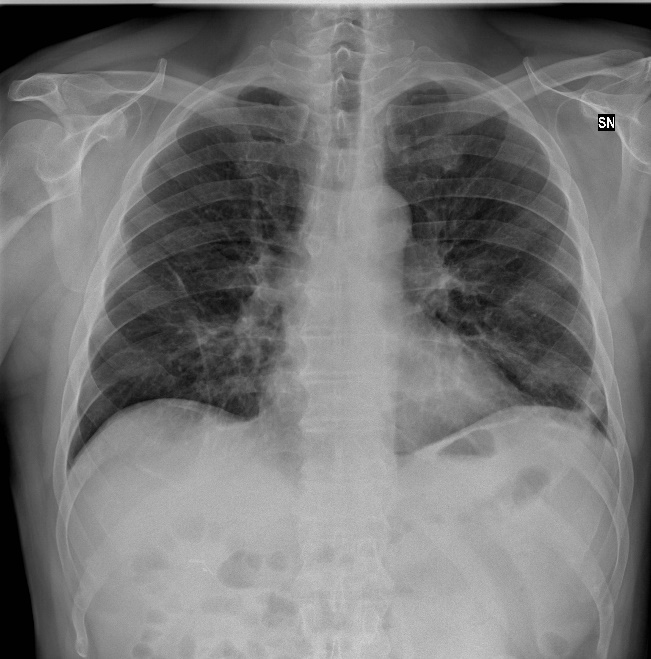

In [7]:
# show original photo
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# imagepath = './covid-chestxray-dataset-master/images/nejmoa2001191_f5-PA.jpeg'
imagepath = "assets/ex-covid.jpeg"
display(Image(imagepath))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


img_m1 [[[184 184 184]
  [183 183 183]
  [183 183 183]
  ...
  [169 169 169]
  [169 169 169]
  [169 169 169]]

 [[187 187 187]
  [184 184 184]
  [181 181 181]
  ...
  [169 169 169]
  [169 169 169]
  [169 169 169]]

 [[190 190 190]
  [186 186 186]
  [183 183 183]
  ...
  [107 107 107]
  [107 107 107]
  [107 107 107]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]
np.expand_dims(x, axis=0) [[[[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.3764706  0.3764706  0.3764706 ]
   [0.34509805 0.34509805 0.34509805]
   [0.33333334 0.33333334 0.33333334]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.0039215

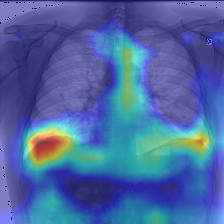

In [6]:
import cv2 as cv
import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
import os, argparse

from google.colab.patches import cv2_imshow
 
def grad_cam(prob_name, label, layer_name, sess, feed_dict, nb_classes):
    """
    prob_name为softmax输出层节点名, label标签, layer_name最后一层卷积层的节点名, sess,                 
    feed_dict, nb_classes分类数
    """
 
    prob = sess.graph.get_tensor_by_name(prob_name + ':0')
    print("prob", prob)
    print("tf.one_hot([label]", tf.one_hot([label], nb_classes))
    loss = tf.multiply(prob, tf.one_hot([label], nb_classes))
    print("loss", loss)
    
    reduced_loss = tf.reduce_sum(loss[0]) # reduced_loss = tf.reduce_sum(loss, axis=1) 
    conv_output = sess.graph.get_tensor_by_name(layer_name + ':0')
    images = tf.placeholder("float", [None, 224, 224, 3])
    print("reduced_loss", reduced_loss)
    print("conv_output", conv_output)
    print("images", images)
    grads = tf.gradients(reduced_loss, conv_output)[0] # grads = tf.gradients(reduced_loss, conv_output)[0] # d loss / d conv
    print("grads", grads)
    # output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    output, grads_val = sess.run([conv_output, grads], feed_dict=feed_dict)
    # output = sess.run(conv_output, feed_dict=feed_dict)
    # grads_val = sess.run(grads, feed_dict=feed_dict)
    print("output.shape", output.shape)
    print("grads_val", grads_val)
    weights = np.mean(grads_val, axis=(1,2))   # weights = np.mean(grads_val, axis=(1, 2)) # average pooling
    cams = np.sum(weights * output, axis=3)  # axis=3
    print("cams", cams)
    return cams
 
 
def save_cam(cam, image, save_path):
    """
    save Grad-CAM images
    """
    # print("cam", cam)
    cam = cam[0]  # cam = cam[0] # the first GRAD-CAM for the first image in  batch
    # image = np.uint8(image_batch[0][:, :, ::-1] * 255.0) # RGB -> BGR
    cam = cv.resize(cam, (224, 224)) # enlarge heatmap
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam) # normalize
    cam = cv.applyColorMap(np.uint8(255 * heatmap), cv.COLORMAP_JET) 
    print("cam - cv.applyColorMap", cam)
    print("heatmap", heatmap)
    # balck-and-white to color
    # test for type error :
    # print("np.float32(cam)", np.float32(cam))
    print("image", image)
    print("np.float32(image)",  np.float32(image))
    cam = np.float32(cam) + np.float32(image) # everlay heatmap onto the image
    cam = 255 * cam / np.max(cam)
    cam = np.uint8(cam)
    
    cv.imwrite(save_path+"cam.jpg", cam)
    cv.imwrite(save_path+"heatmap.jpg", (heatmap * 255.0).astype(np.uint8))
    cv.imwrite(save_path+"segmentation.jpg", (heatmap[:, :, None].astype(float) * image).astype(np.uint8))
 
    return  cam

def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, size, top_percent=0.08, crop=True):
    img = cv.imread(filepath)
    # print("filepath", filepath)
    img = crop_top(img, percent=top_percent)
    if crop:
        img = central_crop(img)
    img = cv.resize(img, (size, size))
    return img
 
 
# def main():
IMAGE_PATH ="assets/ex-covid.jpeg"
output_node_names = "norm_dense_2/Softmax"
final_conv_name="conv5_block3_1_conv/convolution"  #conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
model_path = 'models/COVIDNet-CXR-2/model'


# ckpt = tf.train.get_checkpoint_state(model_path)  # 通过检查点文件锁定最新的模型
saver = tf.train.import_meta_graph(model_path + '.meta')  # 载入图结构，保存在.meta文件中

with tf.Session() as sess:
    saver.restore(sess, model_path)  # 载入参数，参数保存在两个文件中，不过restore会自己寻找


    img_m_0 = cv.imread(IMAGE_PATH)
    
    print("img_m1", img_m_0)
    img_m_0 = cv.resize(img_m_0, (224, 224))


    # img_m = tf.cast(img_m_0, tf.float32)
    # print("img_m2", img_m)
    # img_m = tf.reshape(img_m, [224, 224, 3])
    # print("img_m3", img_m)
    # img_m_f= sess.run([img_m])
    # print("img_m4", img_m)  # shape 480,480,3
    # print("img_m_f", img_m_f)  # shape 1,1,480,480,3
    

    input_image_tensor_m = sess.graph.get_tensor_by_name("input_1:0")

    # input_is_training_tensor = sess.graph.get_tensor_by_name("input/is_training:0")

    x = process_image_file('assets/ex-covid.jpeg', 480, top_percent=0.08)
    x = x.astype('float32') / 255.0
    # feed_dict = {input_image_tensor_m: np.expand_dims(x, axis=0)}
    print("np.expand_dims(x, axis=0)", np.expand_dims(x, axis=0))

    cam=grad_cam(prob_name=output_node_names, label=0, 
                  layer_name=final_conv_name, sess=sess, 
                  feed_dict={input_image_tensor_m: np.expand_dims(x, axis=0)}, 
                  nb_classes=2)

    # feed_dict={input_image_tensor_m: [img_m_f], input_is_training_tensor: False}
    image_batch = img_m_0[None, :, :, :3]
    image = np.uint8(image_batch[0][:, :, ::-1] * 255.0)

    dst_m=save_cam(cam, image, 'm')  # cam, img_m, 'm'
    cv2_imshow(dst_m)
    # cv.imshow('dst_m_v',dst_m)
    cv.waitKey(0)


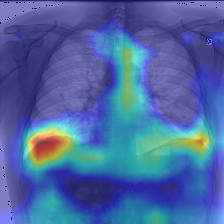

In [8]:
cv2_imshow(dst_m)